# Experimento 0: KNN vs SVM

Comparando desempenho entre os classificadores

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# lista de str ['01', '02', ..., '24']
file_range = ['{:0>2}'.format(chb) for chb in range(1, 25)]

def dataframe_from_chb(chb_number:str):
    df = pd.read_csv(f'./chb{chb_number}/chb{chb_number}_com_dwt.csv')
    df['chb'] = chb_number
    return df

chb_df = pd.concat([dataframe_from_chb(file) for file in file_range], ignore_index=True)

In [4]:
acc_svm_knn = []

for file in file_range:
    chb_copy_df = chb_df.copy()

    # Separando dados de treino e teste
    chb_train = chb_copy_df.query('chb != @file')
    chb_test = chb_copy_df.query('chb == @file')

    chb_train.pop('chb')
    chb_test.pop('chb')

    y_train = chb_train.pop('target').values
    y_test = chb_test.pop('target').values

    sc = StandardScaler().fit(chb_train.values)
    X_train = sc.transform(chb_train.values)
    X_test = sc.transform(chb_test.values)

    # Teste SVM
    svc_acc = SVC(cache_size=500, random_state=0).fit(X_train, y_train).score(X_test, y_test)
    
    # Teste KNN
    knn_acc = KNN().fit(X_train, y_train).score(X_test, y_test)

    acc_svm_knn.append([svc_acc, knn_acc])

pd.DataFrame(data=acc_svm_knn, columns=['SVM', 'KNN']).to_csv('./csvs/knn_vs_svm.csv', index=False)

,SVM,KNN
count,24.000000,24.000000
mean,0.768078,0.742474
std,0.182518,0.162308
min,0.294118,0.382353
25%,0.699337,0.602725
50%,0.829011,0.793068
75%,0.906344,0.870568
max,0.964646,0.954545


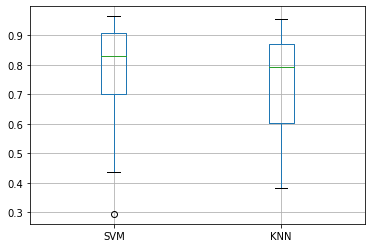

In [5]:
df = pd.read_csv('./csvs/knn_vs_svm.csv')

df.boxplot()
df.describe()

[Text(0, 0.5, 'acurácia')]

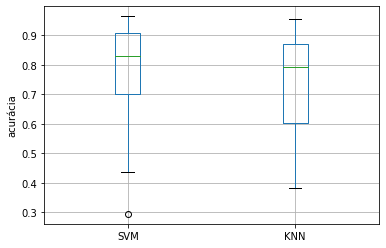

In [6]:
df.boxplot().set(ylabel='acurácia')